<a href="https://colab.research.google.com/github/GourPrahasnt/Booking-Hotel-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing required packages for data manipulation, clean and visualisation


In [ ]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Copy of Hotel Bookings (2).csv'
hotel_df= pd.read_csv(file_path)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.shape

(119390, 32)

##count how many NaN or Null values we have

In [ ]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

we have quite alot of NaN values in company, so removing company attribute will be a better idea from our given hotel dataset.

Also removing those column which are not useful for us

In [ ]:
#drop the columns which are not useful for us
hotel_df.drop(columns=['company','arrival_date_week_number','reservation_status_date'],inplace = True)

In [ ]:
hotel_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2015,July,1,0,2,2,0.0,...,C,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2015,July,1,0,2,2,0.0,...,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2015,July,1,0,3,2,0.0,...,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled
9,Resort Hotel,1,75,2015,July,1,0,3,2,0.0,...,D,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled


#**Univariate Analysis**

By using univariate analysis,we will try to answer following qustions-

## Q.1 From which country most of the guest are coming?

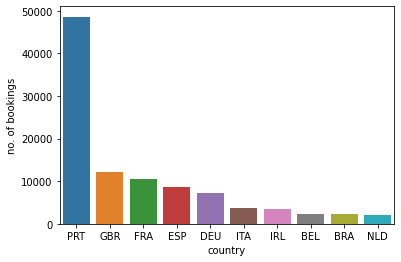

In [ ]:
grp_by_country = hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

we can see in above graph that PRT,GBR,FRA are the countries whose number of bookings are respectively more than other countries.

# Here we took some shortcut which is 
PRT-Portugal, GBR-United kingdom, FRA-France, ESP-spain.

## Q.2 Which room type is in most demand and which room type generates highest Average daily revenue?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


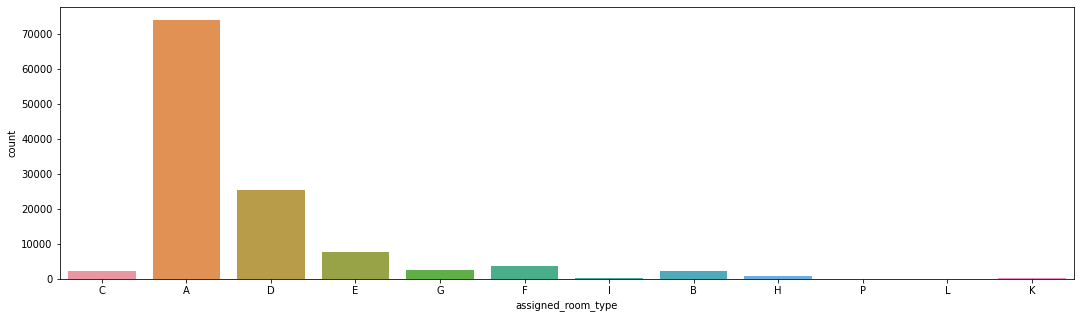

In [ ]:
plt.figure(figsize=(40,5))
plt.subplot(1,2,1)
sns.countplot('assigned_room_type',data = hotel_df)

So here we found that "A" is most assigned room type and it is also most preferred room of the hotel.

## Q.3 Which agent does highest booking of hotels?

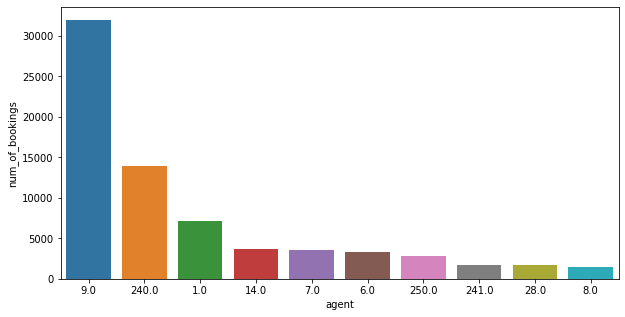

In [ ]:
d1 = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            
d1 = d1[:10]                                                   
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

So we can say through above graph agent no. 9.0 has done most of the booking.

## Q.4 What is most preferred meal by customer?

In [ ]:
#meals prefrene for both the hotel
meals_df = hotel_df.groupby(['hotel'])['meal'].value_counts()

Text(0.5, 0, 'meals')

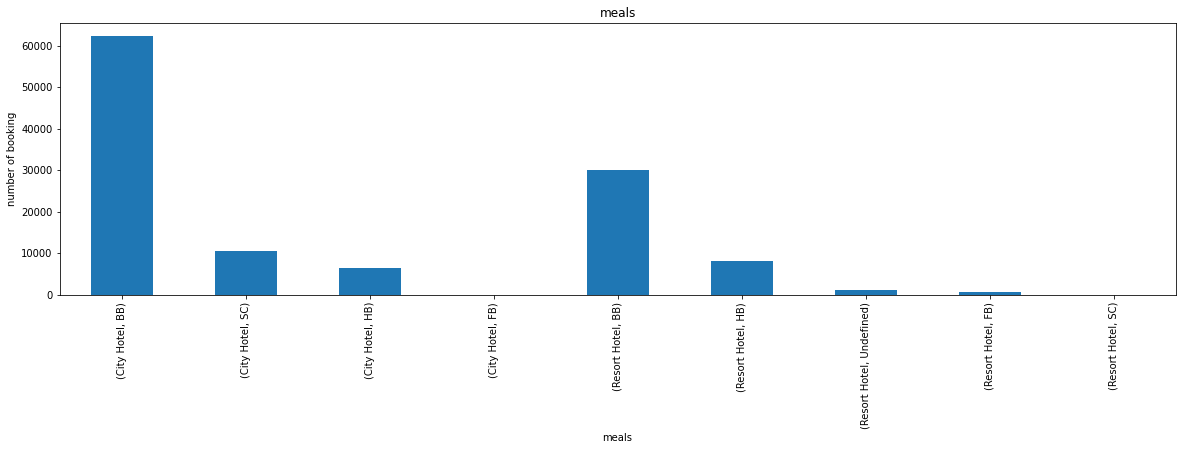

In [ ]:
#ploat the chart
plt.rcParams['figure.figsize'] = (20,5)
meals_df.plot(kind = 'bar')
plt.title('meals')
plt.ylabel('number of booking')
plt.xlabel('meals')

* BB = Bed and Breakfast
* SC = No meal package
* HB = Half board (breakfast and one other meal – usually dinner)
* FB = Full board (breakfast, lunch and dinner)

from the above that it looks like BB(bed and breakfast) is the most preferred meal type for the guest of hotels.

# **Hotel Wise Analysis**

while doing Hotel wise Analysis of given hotel booking dataset,we answerd following qustions-

## Q.1 What is the percentage of bookings in each hotel?

([<matplotlib.patches.Wedge at 0x7f315c8d0a90>,
 [Text(-1.0362439855352659, -0.36905067733576613, 'City Hotel'),
  Text(1.0833459848777778, 0.38582570812375633, 'Resort Hotel')],
 [Text(-0.565223992110145, -0.2013003694558724, '66.4%'),
  Text(0.6123259914526569, 0.21807540024386224, '33.6%')])

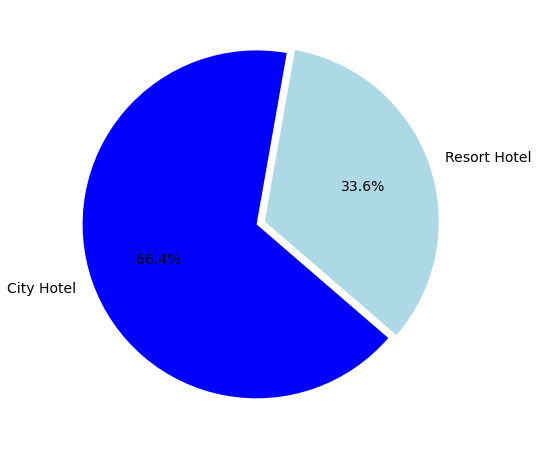

In [ ]:
plt.rcParams['figure.figsize'] = 9,8
labels = hotel_df['hotel'].value_counts().index.tolist()
size = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['blue','lightblue']
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=80, textprops={'fontsize': 14})

we can clearly see that most of the guests preferrd City hotel than Resort hotel.

66% is City Hotel and 34% is Resort Hotel.

##Q.2 which hotel has higher lead time?

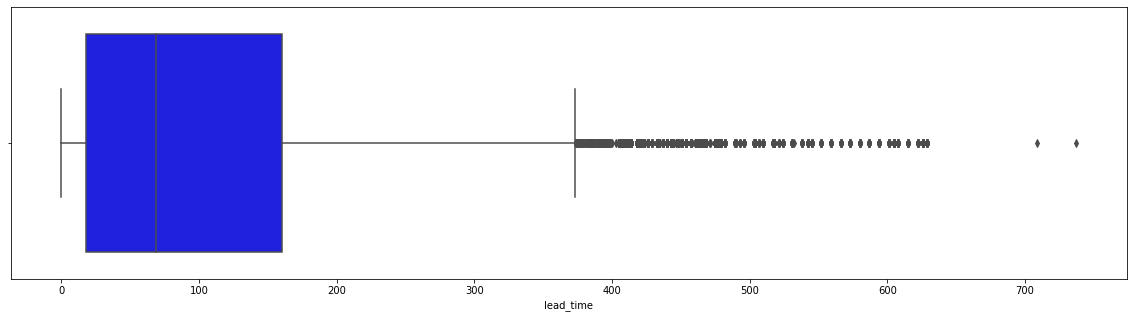

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x = hotel_df['lead_time'],color = 'blue')

According to the analysis of lead time in the given hotel booking dataset,we can say that in the period of three year we have soo many lead times values.

##Q.3 What is most preferred stay weekend night length in each hotel?

In [ ]:
# Firstly filter the data
filter = hotel_df[hotel_df['is_canceled']==0]

In [ ]:
hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

In [ ]:
stay = hotel_df.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})


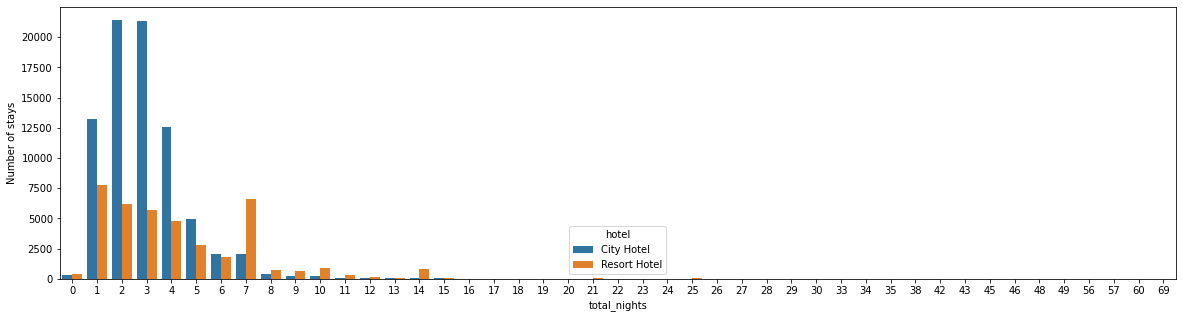

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

Acording to our analysis City hotel is the most preferred hotel for weekend night rather than Resort hotel and customer stays number of time in City hotel.

## Q.4 Which hotel has more number of repeated guest?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


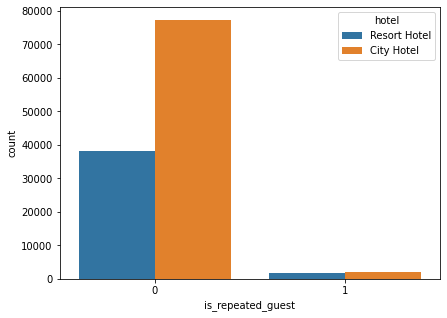

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('is_repeated_guest',hue = 'hotel',data = hotel_df)
# Here hue refers to wheather the guest is repeated or not in hotel

In above graph,
* 0 stands for not
* 1 stands for yes

So according to our analysis, we can say that City hotel has more number of repeated guest than Resort hotel,but if we talk about percentage wise analysis,repeated guest in Resort hotel is more than City hotel.

# **Distribution Channel Wise Analysis**

while doing Distribution channel wise Analysis of given hotel booking dataset,we answerd following qustions-

## Q.1 Which is the most common channel for hotels booking?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.legend>

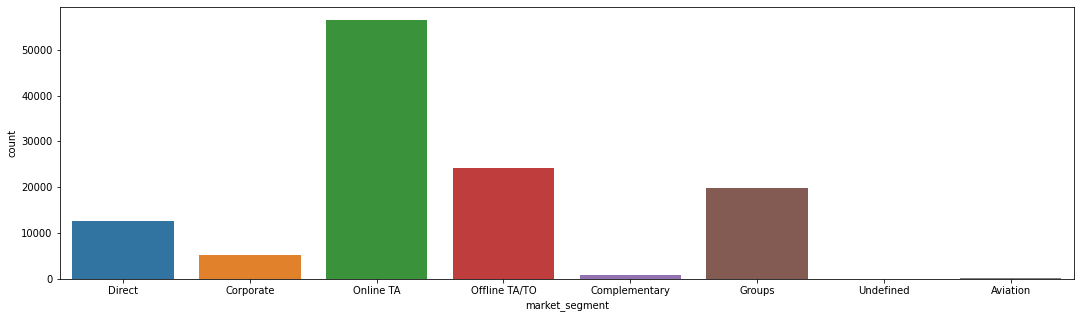

In [ ]:
plt.figure(figsize=(40,5))
plt.subplot(1,2,1)
sns.countplot('market_segment',data = hotel_df)
plt.legend

so online TA(travel agent) is the most common channel for booking hotels compare than other hotels.

Here we can see that most number of guest are making reservation through TA/TO channels which is travel agent and tour operator.



## Q.2 Which distribution channel brings better revenue genrating deal for hotels?

In [ ]:
distribution_channel = hotel_df.groupby(['hotel'])['distribution_channel'].value_counts()

Text(0.5, 0, 'channels')

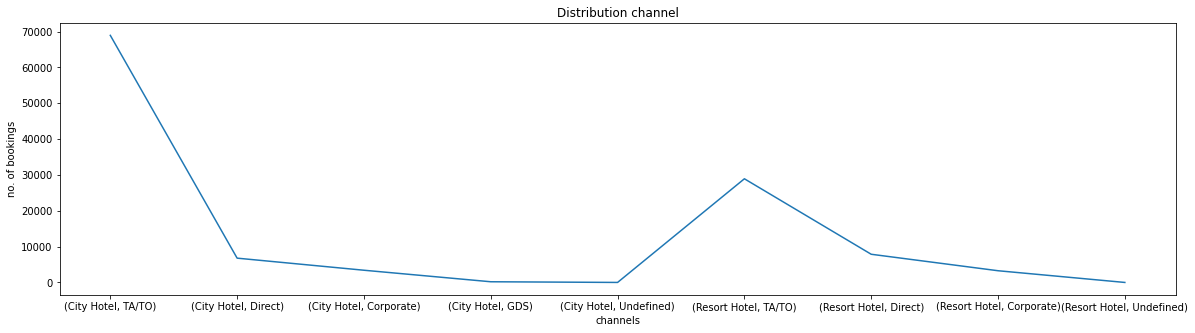

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)
distribution_channel.plot(kind = 'line')
plt.title('Distribution channel')
plt.ylabel('no. of bookings')
plt.xlabel('channels')

* Resort hotel has more revenue generating deals by direct and TA/TO channel.Resort hotel need to increase outreach on GDS to increase revenue.
* GDS channel brings higher revnue generating deals for city hotel.City hotel can work to increase outreach on GDS channel to get more higher revenue generating deal.

# **Booking Cancellation Analysis**

while doing booking cancellation Analysis of given hotel booking dataset,we answerd following qustions-



## Q.1 Which hotel has higher booking cancellations rate?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 360x720 with 0 Axes>

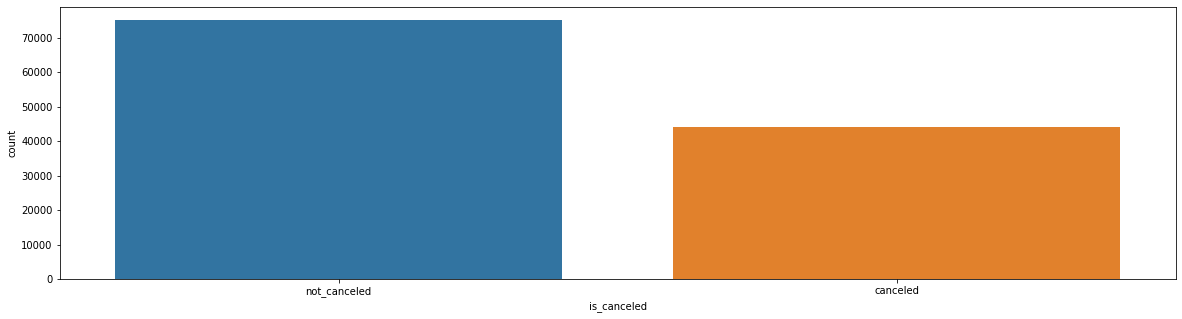

<Figure size 360x720 with 0 Axes>

In [ ]:
hotel_df['is_canceled'] = hotel_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = hotel_df['is_canceled']
sns.countplot(canceled_data)
plt.figure(figsize=(5,10))

  In above graph,
* Blue colour stands for City hotel.
* Orange colour stands for Resort hotel.


so far, we can conclude here that City hotel has higher booking cancellations rate than Resort hotel.

# Q2. which hotel has higher lead time?

In [ ]:
lead_time = hotel_df.groupby('hotel')['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})

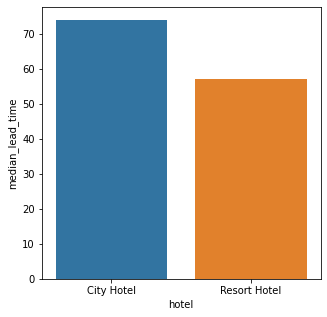

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = lead_time['hotel'], y = lead_time['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time,than the Resort hotel.

# **Time Wise Analysis**

while doing time wise Analysis of given hotel booking dataset,we answerd following qustions-

#Q.1 What are the most busy month of hotels?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


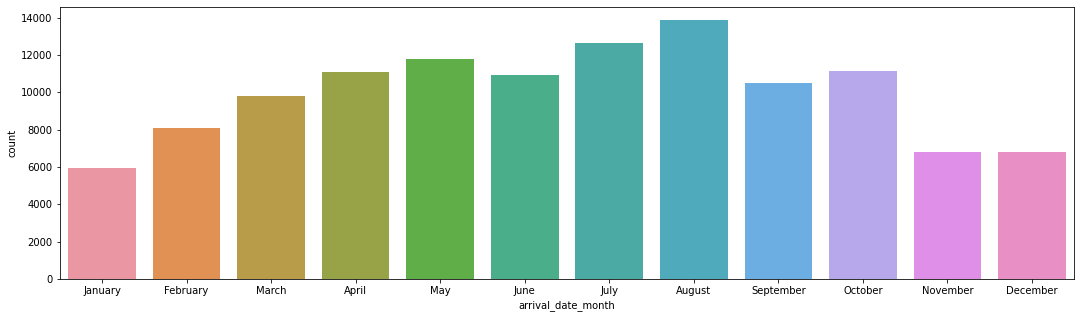

In [ ]:
plt.figure(figsize=(40,5))
plt.subplot(1,2,1)
sns.countplot('arrival_date_month',data = hotel_df,order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December'])

According to month wise analysis of the data,we found that month of 'Auguest' is the most busy month for the hotels.We have very less number of bookings in the year ending and opening.

#Q.2  which  hotel charges highest Average Daily Rate?

In [ ]:
adr_df = hotel_df.groupby('hotel')['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'average_adr'})   

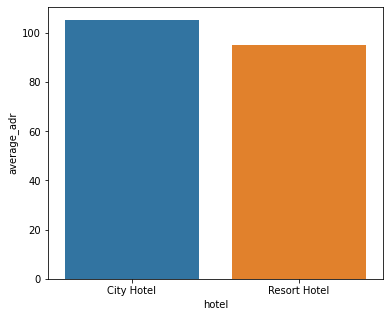

In [ ]:
plt.figure(figsize = (6,5))
sns.barplot(x = adr_df['hotel'], y = adr_df['average_adr'] )
plt.show()

It seems that City hotel charges more average daily rate because it is more in demand.And on the other hand Resort hotel charges less average daily rate as it is in less demand.

# **Important Qustion**

#Q.1 what are the diffrent reason for special request?

In [ ]:
special_request_df = hotel_df.groupby(['hotel'])['total_of_special_requests'].value_counts()

Text(0.5, 0, 'special request')

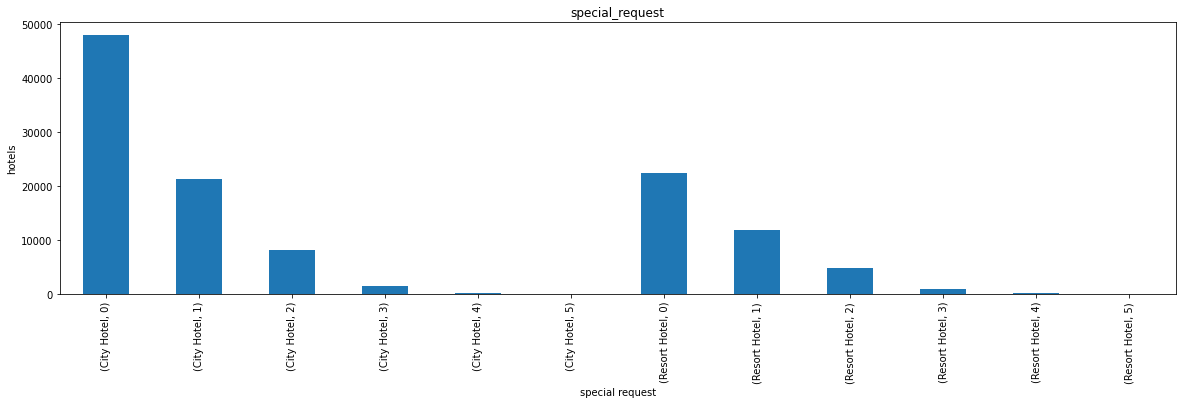

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)
special_request_df.plot(kind = 'bar')
plt.title('special_request')
plt.ylabel('hotels')
plt.xlabel('special request')

So as per our analysis,for special request we can say that City hotel has more special request than Resort hotel.

#**conclusion**

After doing complete analysis of given hotel booking dataset,we came to the following conclusion-
* Around 66.4% bookings are for City hotel and 33.6% are for Resort hotel,therfor City hotel is busier than Resort hotel.Also the overall Average Daily Rate of City hotel is slightly higher than Resort hotel.
* Mostly guests stay for less than 23 days in City hotel and for longer stays Resort hotel is preferred.
* Both hotels have significantly higher booking cancellation rate and very few guests less than 3% return for another booking in city hotel.5% guests return for stay in Resort hotel.
* Most of the guests came from European Countries,with most no. of guest coming from Portugal.
* Bed and breakfast is the most preferred meal by the both hotel guests.
* Guests use diffrent channels for making booking out of which most preferred ways is TA/TO.
* July-August are the most busiest months for both the hotels.
* Within a month ,ADR(average daily revenue) gradually increase as month ends,with small sudden rise on weekends.
* More number of people in guests result in more number of special request.
* For customers ,generally the longer stays(more than 23days)can result in better deals in terms of low ADR.

